In [1]:
#importer les modules dont nous aurons besoin
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import folium
import requests
import json


#importer le module que nous avons crée pour ce projet
import barcelona as ba

In [2]:
###le but de cet outil est de permettre a un entrepreneur de faire l'analyse
###de données provenant des bases de données disponibles publiquement et reperer des occasions d'affaires,
###etudes de marché ou des insights ###
### nous utiliserons les données provenant de https://www.kaggle.com/datasets/xvivancos/barcelona-data-sets
### d'autres bases de données pourraient egalement être traitées par l'utilisateur


### Le code source est hebergé sur https://github.com/alvamig/barcelona ###
### vous pouvez contacter alvaro.chavez-zavaleta@hec.ca si vous désirez devenir collaborateur ###


###
###  Cette partie nous permet de loader les datasets de barcelone
###


#lire les données par défaut
deaths = pd.read_csv("deaths.csv")
accidents_2017 = pd.read_csv("accidents_2017.csv")
air_quality_Nov2017 = pd.read_csv("air_quality_Nov2017.csv")
air_stations_Nov2017 = pd.read_csv("air_stations_Nov2017.csv")
births = pd.read_csv("births.csv")
bus_stops = pd.read_csv("bus_stops.csv")
immigrants_by_nationality = pd.read_csv("immigrants_by_nationality.csv")
immigrants_emigrants_by_age = pd.read_csv("immigrants_emigrants_by_age.csv")
immigrants_emigrants_by_destination = pd.read_csv("immigrants_emigrants_by_destination.csv")
immigrants_emigrants_by_destination2 = pd.read_csv("immigrants_emigrants_by_destination2.csv")
immigrants_emigrants_by_sex = pd.read_csv("immigrants_emigrants_by_sex.csv")
life_expectancy = pd.read_csv("life_expectancy.csv")
most_frequent_baby_names = pd.read_csv("most_frequent_baby_names.csv")
most_frequent_names = pd.read_csv("most_frequent_names.csv")
population = pd.read_csv("population.csv")
transports = pd.read_csv("transports.csv")
unemployment = pd.read_csv("unemployment.csv")
#par default
data = population

#crée une liste des dfs disponibles
loadeddfs = []
loadeddfs = ["deaths.csv","accidents_2017.csv","air_quality_Nov2017.csv","air_stations_Nov2017.csv"]
loadeddfs.extend(["births.csv","bus_stops.csv","immigrants_by_nationality.csv","immigrants_emigrants_by_age.csv"])
loadeddfs.extend(["immigrants_emigrants_by_destination.csv","immigrants_emigrants_by_destination2.csv"])
loadeddfs.extend(["immigrants_emigrants_by_sex.csv","life_expectancy.csv","unemployment.csv"])
loadeddfs.extend(["most_frequent_baby_names.csv","most_frequent_names.csv","population.csv","transports.csv"])
#display(loadeddfs)

#ce dictionnaire nous permettra de documenter les fonctions que nous créeons dans le programme
fonctions = {}

In [13]:
##
## cette partie du code fait appel aux des diverses fonctions du module que nous avons crée
##


#presente les jeux de donnnées qui viennent avec le programme
ba.bonjour(loadeddfs)

Bonjour! ce programme contient par défaut des données de la ville de Barcelone
voulez vous voir les datasets disponibles?
oui/non
oui
les voici:



['deaths.csv',
 'accidents_2017.csv',
 'air_quality_Nov2017.csv',
 'air_stations_Nov2017.csv',
 'births.csv',
 'bus_stops.csv',
 'immigrants_by_nationality.csv',
 'immigrants_emigrants_by_age.csv',
 'immigrants_emigrants_by_destination.csv',
 'immigrants_emigrants_by_destination2.csv',
 'immigrants_emigrants_by_sex.csv',
 'life_expectancy.csv',
 'unemployment.csv',
 'most_frequent_baby_names.csv',
 'most_frequent_names.csv',
 'population.csv',
 'transports.csv']

In [14]:
# permet a l'usager de voir le contenu d'un dataframe parmis ceux qui viennent par défaut
# il peut aussi indiquer l'adresse d'un dataframe tout autre
# doit etre en inscrit en .csv

ba.choixdf(loadeddfs,pd,data)

vous pouvez choisir un jeu de données ou en ajouter un nouveau.
voulez-vous proceder? oui/non
oui
veuillez entrer le nom ou l'emplacement des données:
celles-ci doivent être en format csv
le fichier est lu avec pandas.read_csv
unemployment


le fichier ne peut être lu
veuillez vérifier l'emplacement ou le nom

voulez-vous recommencer?
unemployment.csv


Year  District.Code District.Name  Neighborhood.Code  \
0      2017              1  Ciutat Vella                  1   
1      2017              1  Ciutat Vella                  2   
2      2017              1  Ciutat Vella                  3   
3      2017              1  Ciutat Vella                  4   
4      2017              2      Eixample                  5   
...     ...            ...           ...                ...   
70075  2013             10    Sant Martí                 69   
70076  2013             10    Sant Martí                 70   
70077  2013             10    Sant Martí                 71   
70078  2013             10    Sant Martí                 72   
70079  2013             10    Sant Martí                 73   

                                  Neighborhood.Name  Gender   Age  Number  
0                                          el Raval    Male   0-4     224  
1                                    el Barri Gòtic    Male   0-4      50  
2                                    la Barceloneta    Male   0-4      43  
3             Sant Pere, Santa Caterina i la Ribera    Male   0-4      95  
4                                     el Fort Pienc    Male   0-4     124  
...                                             ...     ...   ...     ...  
70075  Diagonal Mar i el Front Marítim del Poblenou  Female  >=95      21  
70076                         el Besòs i el Maresme  Female  >=95      25  
70077                       Provençals del Poblenou  Female  >=95      31  
70078                      Sant Martí de Provençals  Female  >=95      38  
70079                           la Verneda i la Pau  Female  >=95      47  

[70080 rows x 8 columns]

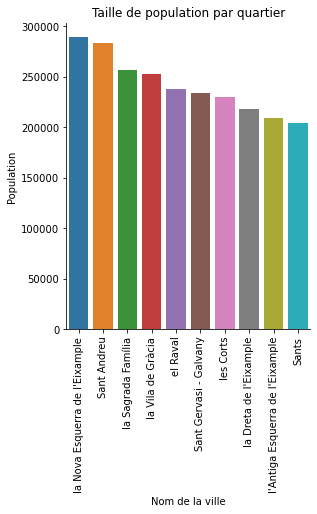

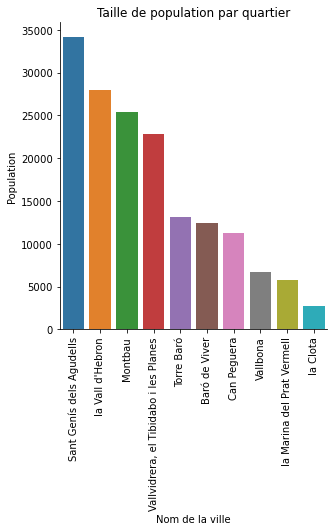

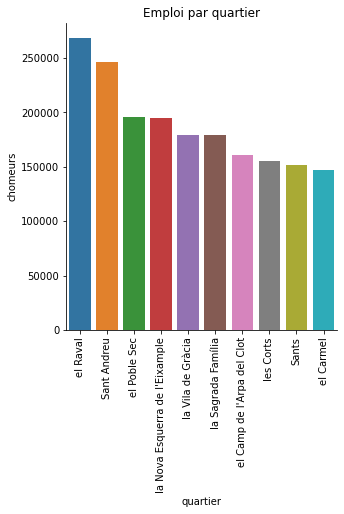

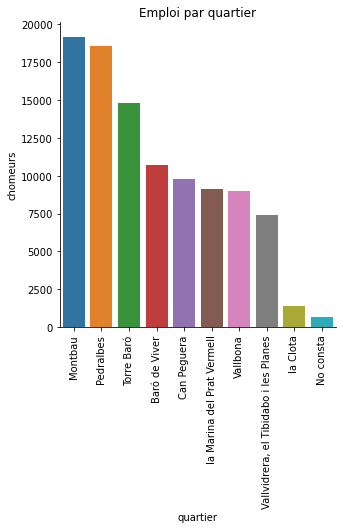

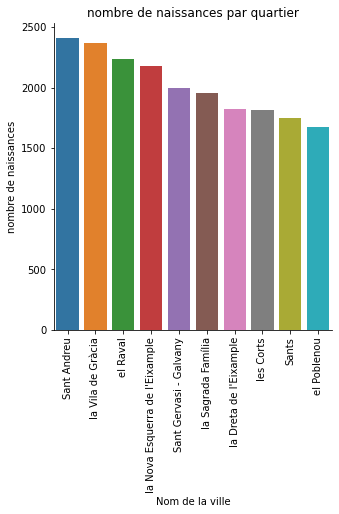

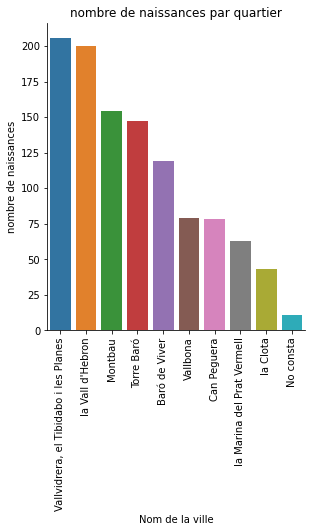

In [4]:
# Maintenant, on commence notre analyse:


# Quels sont les 10 quartiers qui ont les plus/moins de population ? - clientèle potentielle

ba.barres(data=population,colonne1 = 'Neighborhood.Name',colonne2='Number',xlabel='Nom de la ville',
           ylabel="Population",title="Taille de population par quartier",fonctions=fonctions)

# Quels sont les 10 quartiers qui ont les plus/moins de chômeurs ? - travilleur potentiels
ba.barres(data=unemployment,colonne1='Neighborhood Name',title='Emploi par quartier',xlabel='quartier',ylabel='chomeurs',fonctions=fonctions)

# Quels sont les 10 quartiers qui ont les plus/moins de naissances ? - jeunes couples famille - clientèle
ba.barres(data=births,colonne1 = 'Neighborhood Name',colonne2='Number',xlabel='Nom de la ville',
           ylabel="nombre de naissances",title="nombre de naissances par quartier",fonctions=fonctions)

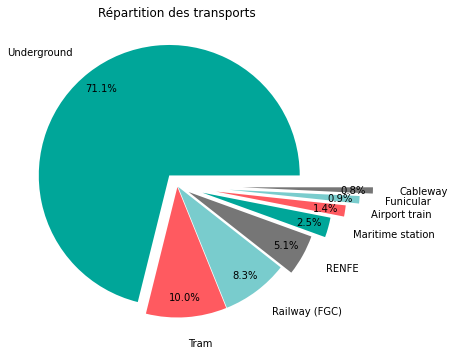

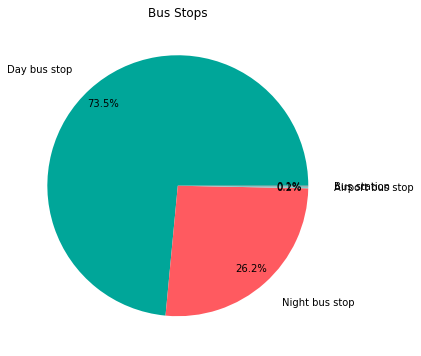

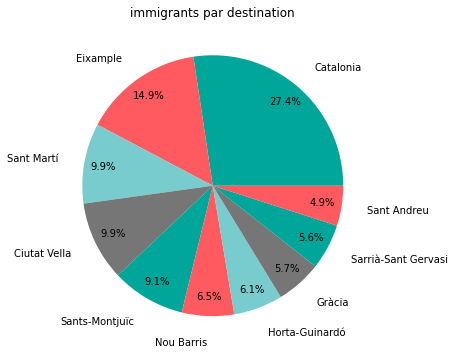

In [5]:
# Affichage de la repartition des modes de transport ainsi que la repartition entre les bus de jour et de nuit:

#Quelle est la répartition des transports? - comment mes travailleurs pourraient se rendre au travail?
ba.pie(data=transports)

#Quels sont les différents types de bus-stop? - comment le reséau de bus de nuit est dévélopé ?
ba.pie(title='Bus Stops',data=bus_stops,col1='Transport',explode=None)

#Dans quel quartier il y a le plus d'immigration? - potentiels travailleurs
ba.pie(title='immigrants par destination',data=immigrants_emigrants_by_destination2,col1='to',explode=None, ag='sum',col2 = 'weight')

In [6]:
# Pour cette partie, on fait le tri des dataframe selon les critères choisis par l'utilisateur:


# Quelle est la répartition des tranches d'âges de la population selon l'année et le quartier choisi par l'utilisateur? 
ba.tritempsetautre(data=population)

#Quelle est la répartition des chomeurs pour les differents mois de l'année et du quartier choisi par l'utilisateur?
ba.tritempsetautre(data=unemployment,col1='Year',col2 = 'Neighborhood Name')

choisir une année entre 2013 et 2017
2015
l'annee choisie est : 2015
voici vos choix:



array(['el Raval', 'el Barri Gòtic', 'la Barceloneta',
       'Sant Pere, Santa Caterina i la Ribera', 'el Fort Pienc',
       'la Sagrada Família', "la Dreta de l'Eixample",
       "l'Antiga Esquerra de l'Eixample",
       "la Nova Esquerra de l'Eixample", 'Sant Antoni', 'el Poble Sec',
       'la Marina del Prat Vermell', 'la Marina de Port',
       'la Font de la Guatlla', 'Hostafrancs', 'la Bordeta',
       'Sants - Badal', 'Sants', 'les Corts',
       'la Maternitat i Sant Ramon', 'Pedralbes',
       'Vallvidrera, el Tibidabo i les Planes', 'Sarrià',
       'les Tres Torres', 'Sant Gervasi - la Bonanova',
       'Sant Gervasi - Galvany', 'el Putxet i el Farró',
       'Vallcarca i els Penitents', 'el Coll', 'la Salut',
       'la Vila de Gràcia', "el Camp d'en Grassot i Gràcia Nova",
       'el Baix Guinardó', 'Can Baró', 'el Guinardó',
       "la Font d'en Fargues", 'el Carmel', 'la Teixonera',
       'Sant Genís dels Agudells', 'Montbau', "la Vall d'Hebron",
       'la Clota', '

choisir un filtre parmi les options 
el Clot
le choisi de filtre est : el Clot


Year  District.Code District.Name  Neighborhood.Code Neighborhood.Name  \
28096  2015             10    Sant Martí                 65           el Clot   
28169  2015             10    Sant Martí                 65           el Clot   
28242  2015             10    Sant Martí                 65           el Clot   
28315  2015             10    Sant Martí                 65           el Clot   
28388  2015             10    Sant Martí                 65           el Clot   
...     ...            ...           ...                ...               ...   
41747  2015             10    Sant Martí                 65           el Clot   
41820  2015             10    Sant Martí                 65           el Clot   
41893  2015             10    Sant Martí                 65           el Clot   
41966  2015             10    Sant Martí                 65           el Clot   
42039  2015             10    Sant Martí                 65           el Clot   

       Gender    Age  Number  
28096    Male    0-4      85  
28169    Male    0-4      99  
28242    Male    0-4     114  
28315    Male    0-4     109  
28388    Male    0-4     111  
...       ...    ...     ...  
41747  Female  90-94      49  
41820  Female  90-94      28  
41893  Female  90-94      25  
41966  Female  90-94      20  
42039  Female   >=95      35  

[192 rows x 8 columns]

choisir une année entre 2013 et 2017
2014
l'annee choisie est : 2014
voici vos choix:



array(['el Raval', 'el Barri Gòtic', 'la Barceloneta',
       'Sant Pere, Santa Caterina i la Ribera', 'el Fort Pienc',
       'la Sagrada Família', "la Dreta de l'Eixample",
       "l'Antiga Esquerra de l'Eixample",
       "la Nova Esquerra de l'Eixample", 'Sant Antoni', 'el Poble Sec',
       'la Marina del Prat Vermell', 'la Marina de Port',
       'la Font de la Guatlla', 'Hostafrancs', 'la Bordeta',
       'Sants - Badal', 'Sants', 'les Corts',
       'la Maternitat i Sant Ramon', 'Pedralbes',
       'Vallvidrera, el Tibidabo i les Planes', 'Sarrià',
       'les Tres Torres', 'Sant Gervasi - la Bonanova',
       'Sant Gervasi - Galvany', 'el Putxet i el Farró',
       'Vallcarca i els Penitents', 'el Coll', 'la Salut',
       'la Vila de Gràcia', "el Camp d'en Grassot i Gràcia Nova",
       'el Baix Guinardó', 'Can Baró', 'el Guinardó',
       "la Font d'en Fargues", 'el Carmel', 'la Teixonera',
       'Sant Genís dels Agudells', 'Montbau', "la Vall d'Hebron",
       'la Clota', '

choisir un filtre parmi les options 
Verdun
le choisi de filtre est : Verdun


Year      Month  District Code District Name  Neighborhood Code  \
10706  2014    January              8    Nou Barris                 51   
10780  2014    January              8    Nou Barris                 51   
10854  2014   February              8    Nou Barris                 51   
10928  2014   February              8    Nou Barris                 51   
11002  2014      March              8    Nou Barris                 51   
11076  2014      March              8    Nou Barris                 51   
11150  2014      April              8    Nou Barris                 51   
11224  2014      April              8    Nou Barris                 51   
11298  2014        May              8    Nou Barris                 51   
11372  2014        May              8    Nou Barris                 51   
11446  2014       June              8    Nou Barris                 51   
11520  2014       June              8    Nou Barris                 51   
11594  2014       July              8    Nou Barris                 51   
11668  2014       July              8    Nou Barris                 51   
11742  2014     August              8    Nou Barris                 51   
11816  2014     August              8    Nou Barris                 51   
11890  2014  September              8    Nou Barris                 51   
11964  2014  September              8    Nou Barris                 51   
12038  2014    October              8    Nou Barris                 51   
12112  2014    October              8    Nou Barris                 51   
12186  2014   November              8    Nou Barris                 51   
12260  2014   November              8    Nou Barris                 51   
12334  2014   December              8    Nou Barris                 51   
12408  2014   December              8    Nou Barris                 51   

      Neighborhood Name  Gender      Demand_occupation  Number  
10706            Verdun    Male  Registered unemployed     578  
10780            Verdun  Female  Registered unemployed     528  
10854            Verdun    Male  Registered unemployed     578  
10928            Verdun  Female  Registered unemployed     524  
11002            Verdun    Male  Registered unemployed     577  
11076            Verdun  Female  Registered unemployed     534  
11150            Verdun    Male  Registered unemployed     571  
11224            Verdun  Female  Registered unemployed     522  
11298            Verdun    Male  Registered unemployed     545  
11372            Verdun  Female  Registered unemployed     508  
11446            Verdun    Male  Registered unemployed     532  
11520            Verdun  Female  Registered unemployed     501  
11594            Verdun    Male  Registered unemployed     520  
11668            Verdun  Female  Registered unemployed     512  
11742            Verdun    Male  Registered unemployed     519  
11816            Verdun  Female  Registered unemployed     499  
11890            Verdun    Male  Registered unemployed     520  
11964            Verdun  Female  Registered unemployed     503  
12038            Verdun    Male  Registered unemployed     530  
12112            Verdun  Female  Registered unemployed     505  
12186            Verdun    Male  Registered unemployed     531  
12260            Verdun  Female  Registered unemployed     501  
12334            Verdun    Male  Registered unemployed     525  
12408            Verdun  Female  Registered unemployed     487

Year      Month  District Code District Name  Neighborhood Code  \
10706  2014    January              8    Nou Barris                 51   
10780  2014    January              8    Nou Barris                 51   
10854  2014   February              8    Nou Barris                 51   
10928  2014   February              8    Nou Barris                 51   
11002  2014      March              8    Nou Barris                 51   
11076  2014      March              8    Nou Barris                 51   
11150  2014      April              8    Nou Barris                 51   
11224  2014      April              8    Nou Barris                 51   
11298  2014        May              8    Nou Barris                 51   
11372  2014        May              8    Nou Barris                 51   
11446  2014       June              8    Nou Barris                 51   
11520  2014       June              8    Nou Barris                 51   
11594  2014       July              8    Nou Barris                 51   
11668  2014       July              8    Nou Barris                 51   
11742  2014     August              8    Nou Barris                 51   
11816  2014     August              8    Nou Barris                 51   
11890  2014  September              8    Nou Barris                 51   
11964  2014  September              8    Nou Barris                 51   
12038  2014    October              8    Nou Barris                 51   
12112  2014    October              8    Nou Barris                 51   
12186  2014   November              8    Nou Barris                 51   
12260  2014   November              8    Nou Barris                 51   
12334  2014   December              8    Nou Barris                 51   
12408  2014   December              8    Nou Barris                 51   

      Neighborhood Name  Gender      Demand_occupation  Number  
10706            Verdun    Male  Registered unemployed     578  
10780            Verdun  Female  Registered unemployed     528  
10854            Verdun    Male  Registered unemployed     578  
10928            Verdun  Female  Registered unemployed     524  
11002            Verdun    Male  Registered unemployed     577  
11076            Verdun  Female  Registered unemployed     534  
11150            Verdun    Male  Registered unemployed     571  
11224            Verdun  Female  Registered unemployed     522  
11298            Verdun    Male  Registered unemployed     545  
11372            Verdun  Female  Registered unemployed     508  
11446            Verdun    Male  Registered unemployed     532  
11520            Verdun  Female  Registered unemployed     501  
11594            Verdun    Male  Registered unemployed     520  
11668            Verdun  Female  Registered unemployed     512  
11742            Verdun    Male  Registered unemployed     519  
11816            Verdun  Female  Registered unemployed     499  
11890            Verdun    Male  Registered unemployed     520  
11964            Verdun  Female  Registered unemployed     503  
12038            Verdun    Male  Registered unemployed     530  
12112            Verdun  Female  Registered unemployed     505  
12186            Verdun    Male  Registered unemployed     531  
12260            Verdun  Female  Registered unemployed     501  
12334            Verdun    Male  Registered unemployed     525  
12408            Verdun  Female  Registered unemployed     487

In [7]:

#ou est-ce qu'on trouve le plus d<arrets de bus et des bus de nuit 
ba.carte(bus_stops)

In [8]:
#est-ce que certains quartiers sont plus dangereux? ou est-ce qu'oon retrouve le plus d'accidents de jour/nuit
ba.carte(accidents_2017,col1='Neighborhood Name',col2='Part of the day',critere='Night',name="Accidents d'auto")

['Female' 'Male']
choisisez parmi les valeurs affichees : 
Female
Gender
['2006-2010', '2007-2011', '2008-2012', '2009-2013', '2010-2014']
choisisez l'index de la periode voulue le premier i=1:  
2
la periode choisie est : 2007-2011


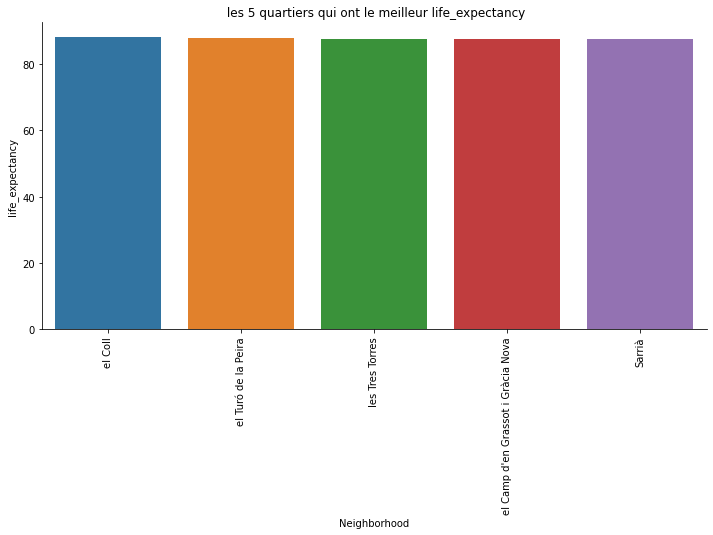

Vous avez 73 quartiers


0              1         2            3   \
Neighborhood   la Verneda i la Pau  Baró de Viver  Can Baró  Can Peguera   

                     4                 5   \
Neighborhood  Canyelles  Ciutat Meridiana   

                                                        6      7   \
Neighborhood  Diagonal Mar i el Front Marítim del Poblenou  Horta   

                       8        9   ...        63            64  \
Neighborhood  Hostafrancs  Montbau  ...  la Salut  la Teixonera   

                            65                 66                67  \
Neighborhood  la Trinitat Nova  la Trinitat Vella  la Vall d'Hebron   

                                         68                 69         70  \
Neighborhood  la Vila Olímpica del Poblenou  la Vila de Gràcia  les Corts   

                        71               72  
Neighborhood  les Roquetes  les Tres Torres  

[1 rows x 73 columns]

choisisez l'index  du quartier a analyser
4
Vous avez choisi : 4 -Canyelles
['Female' 'Male']
choisisez le sexe voulu : 
Male
le sexe choisi est : Male


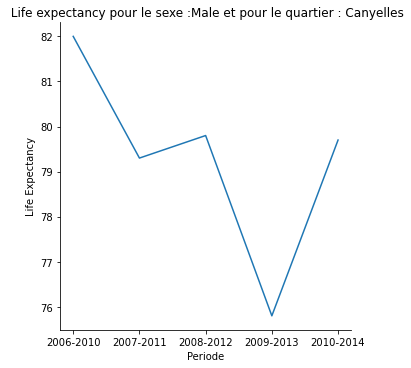

In [9]:
#dans quels cartiers nous trouvous la plus haute espérance de vie - clientèle aisée?? 
#comment celle-ci evolue dans le temps selon le sexe ? niche a explorer
#affiche des analyses sur l'esperance de vie, le sexe et le quartier

ba.sex(life_expectancy)

['Female' 'Male']
choisisez le sexe voulu : 
MAle
Choix inconnu, choissisez entre 'Male' et 'Female' 
choisisez le sexe voulu : 
Male
le sexe choisi est : Male


0     1     2     3     4
Year  2013  2014  2015  2016  2017

choisir l'index  de l'année a analyser
3
Vous avez choisi : 3 -2016


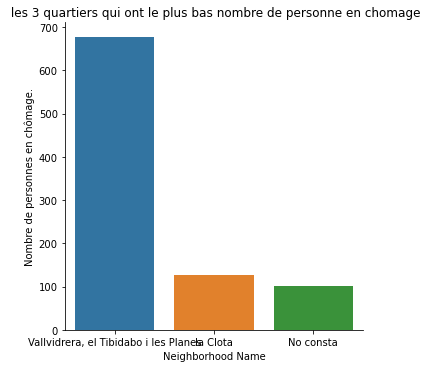

In [10]:
#dans quels quartiers on pourrait mettre des points de vente? ou est-ce que l'économie se porte bien?
# affiche les trois quartiers avec le moins de chomage par année et type de clietèle
ba.unemployment(data=unemployment)

choisir un quartier
Navas


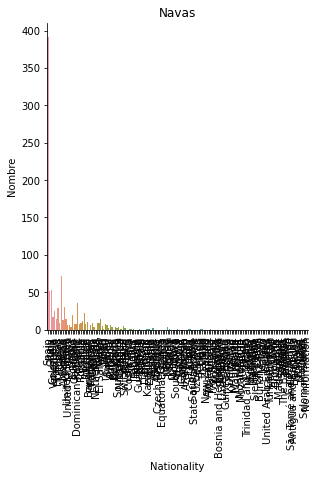

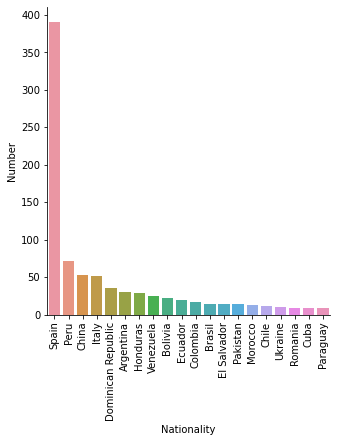

In [11]:
#est-ce qu'on pourrait s'adresser a une clientèle spécifique - ex resto péruvien?
# affiche un histogramme avec l'origine des immigrants les plus nombreux par cartier choisi
ba.histo(data = immigrants_by_nationality)

In [12]:
### Dans ce projet nous avons pu mettre en pratique enormement de notions du cours de programation en gestion
### A plus haut niveau le plus grand defi que nous avons su relever etait celui-ci de collaborer efficacement a distance
### a cet effet nous avons adopté et appris a utiliser github, cela  nous a meme sauvés puisque a un certain moment
### on a efface une bonne partie par mégarde et nous avons ainsi pu le recuperer
### de plus lorsque au fur et a mesure que note code gagnait en longeur et complexité nous avons décidé de le découper
### en fonctions. Cela nous a permis de gagner simplicité et flexibilité
### une fois que nous avions des fonctions logiquement nous avons décidé de toutes les regrouper dans un module de notre cru
### ainsi nous pouvons maintenant appeler au besoin
### a plus bas niveau, nous avons apris a mettre en pratique Pandas, Seaborn, Folium ainsi que Requests, nous avons traité des df et importé du code du web directement dans notre programme